# PCA example

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

/var/folders/yz/tc37ln4s79nby0y8zc6cqhz40000gn/T/ipykernel_2848/420777803.py:1: DeprecationWarning: The symbol module is deprecated and will be removed in future versions of Python
  from symbol import comparison


In [36]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

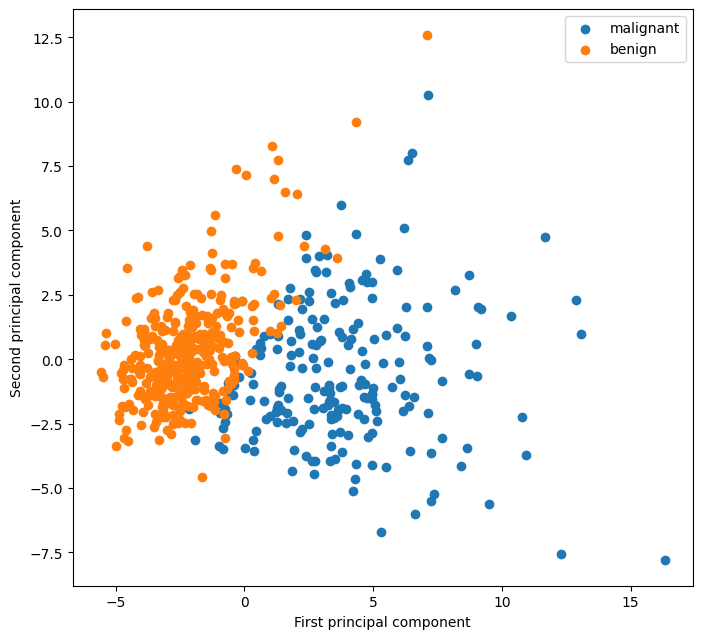

In [37]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
#plt.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.scatter(X_pca[cancer.target==0, 0], X_pca[cancer.target==0, 1])
plt.scatter(X_pca[cancer.target==1, 0], X_pca[cancer.target==1, 1])
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data.
For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points.

You can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that even a linear classifier could do a reasonably good job at distinguishing the two classes.

# Assignment

Split your original dataset into training and test sets. Apply PCA transformation to both sets, then use two different linear classifiers to distinguish malignant and benign classes, and compare the performance of your classifiers.

Submit your notebook on iCampus with code cells and results (in HTML or PDF format)

In [38]:
#To do: Split your original dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42
)

print('Trained dataset: ', X_train.shape)
print('tests set: ', X_test.shape)

Trained dataset:  (455, 30)
tests set:  (114, 30)


In [39]:
#To do: Apply PCA transformation to both sets

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_tran  m(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('Transformed dataset: ', X_train_pca.shape)
print('Transformed tests: ', X_test_pca.shape)


Transformed dataset:  (455, 2)
Transformed tests:  (114, 2)


In [40]:
#To do: use two different linear classifiers to distinguish malignant and benign classes

log_reg = LogisticRegression(random_state=42)
linear_svc = LinearSVC(random_state=42, max_iter=10000)

log_reg.fit(X_train_pca, y_train)
linear_svc.fit(X_train_pca, y_train)

y_pred_lr = log_reg.predict(X_test_pca)
y_pred_svc = linear_svc.predict(X_test_pca)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print('Accuracy of logistic regression : {:.2f}%'.format(accuracy_lr * 100))
print('Accuracy of LinearSVC : {:.2f}%'.format(accuracy_svc * 100))


Accuracy of logistic regression : 99.12%
Accuracy of LinearSVC : 99.12%


Classification ratio for logistic regression: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion matrix for logistic regression: 
[[42  1]
 [ 0 71]]

Classification report for LinearSVC: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion matrix for LinearSVC: 
[[42  1]
 [ 0 71]]


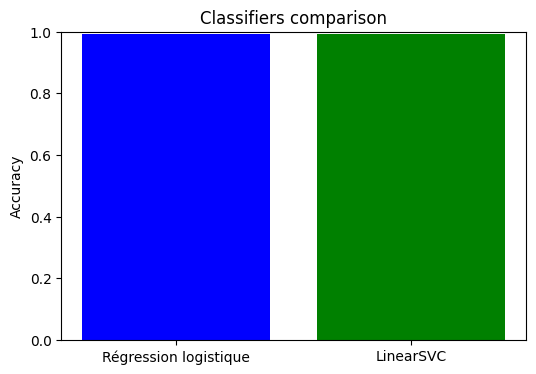

In [41]:
#To do: compare the performance of your classifiers

print('Classification ratio for logistic regression: ')
print(classification_report(y_test, y_pred_lr))
print('Confusion matrix for logistic regression: ')
print(confusion_matrix(y_test, y_pred_lr))

print('\nClassification report for LinearSVC: ')
print(classification_report(y_test, y_pred_svc))
print('Confusion matrix for LinearSVC: ')
print(confusion_matrix(y_test, y_pred_svc))

classifiers = ['Régression logistique', 'LinearSVC']
accuracies = [accuracy_lr, accuracy_svc]

plt.figure(figsize=(6, 4))
plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Classifiers comparison')
plt.ylim(0, 1)
plt.show()
